In [2]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd


/Users/jesse/workspace/distbelief/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
df = pd.read_csv('test.csv')

In [6]:
df

,Unnamed: 0,iteration,test_accuracy,test_loss,timestamp,training_accuracy,training_loss
0,0,0,NaN,NaN,2018-08-02 15:21:47.024790,0.125000,2.304602
1,1,1,NaN,NaN,2018-08-02 15:21:47.089930,0.203125,2.297473
2,2,2,NaN,NaN,2018-08-02 15:21:47.117361,0.078125,2.306774
3,3,3,NaN,NaN,2018-08-02 15:21:47.147414,0.093750,2.288317
4,4,4,NaN,NaN,2018-08-02 15:21:47.214482,0.078125,2.306827
5,5,5,NaN,NaN,2018-08-02 15:21:47.245594,0.125000,2.309554
6,6,6,NaN,NaN,2018-08-02 15:21:47.285473,0.093750,2.292985
7,7,7,NaN,NaN,2018-08-02 15:21:47.365498,0.125000,2.299645
8,8,8,NaN,NaN,2018-08-02 15:21:47.451011,0.109375,2.302357
9,9,9,NaN,NaN,2018-08-02 15:21:47.486472,0.031250,2.311213


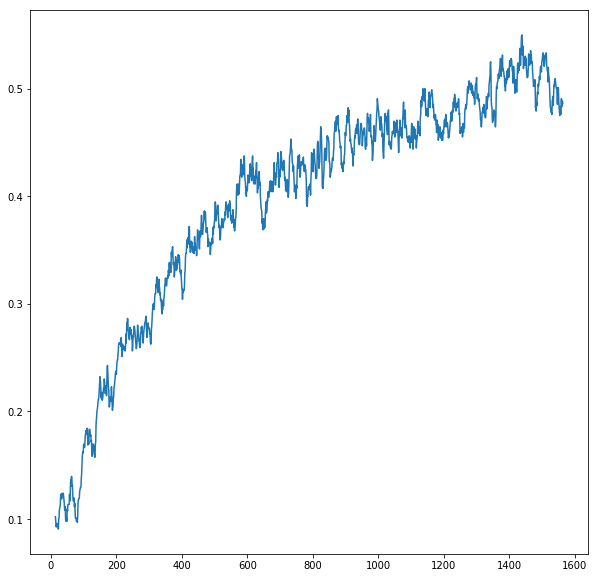

In [19]:
fig = plt.figure(figsize=(10, 10))
plt.plot(df['Unnamed: 0'],df['training_accuracy'].rolling(15).mean())